## 1. 
Write a program that accepts a comma-separated sequence of words as input and prints the words in a comma-separated sequence after sorting them alphabetically.

In [3]:
words = input("Enter some words seperated by comma : ")
words = words.split(',')
words = [word.strip() for word in words]
words

Enter some words seperated by comma :   python , in  ,  super,coding


['python', 'in', 'super', 'coding']

In [5]:
#  sort the words alphabetically
words.sort()
print(*words, sep=', ')

coding, in, python, super


## 2. Blood donation Dataset

In [8]:
import pandas as pd

train = pd.read_csv("blood_train.csv")
test = pd.read_csv("blood_test.csv")
df = pd.merge(train,test)
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,target
0,2,1,250,2,0
1,2,1,250,2,0
2,2,1,250,2,0
3,2,1,250,2,0
4,2,1,250,2,0


In [9]:
df.shape

(301, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   301 non-null    int64
 1   Number of Donations          301 non-null    int64
 2   Total Volume Donated (c.c.)  301 non-null    int64
 3   Months since First Donation  301 non-null    int64
 4   target                       301 non-null    int64
dtypes: int64(5)
memory usage: 14.1 KB


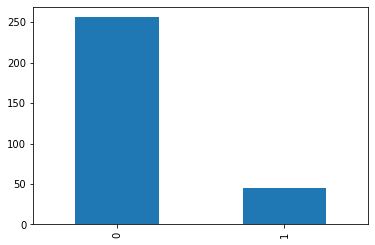

In [11]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot.bar()
plt.show()

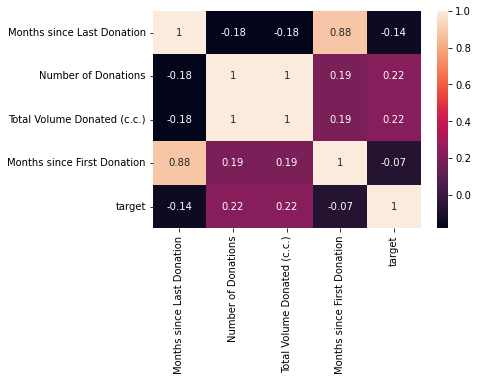

In [12]:
import seaborn as sns

fig, axes = plt.subplots()
sns.heatmap(df.corr(), annot=True, ax=axes)   # plot correlation
plt.show()

In [13]:
X = df.iloc[:,:-1]   # independent variables : all column except the last column
y = df['target']     # dependent variable : the last column

In [14]:
from sklearn.model_selection import train_test_split
# Split dataset into 75% training data and 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy*100:.2f}%") 

Accuracy = 86.84%


The model has 86.84% accuracy!

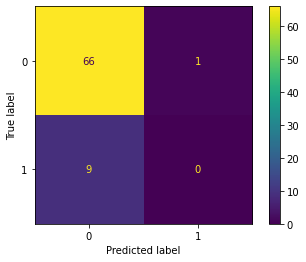

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

## 3. Mobile Price Dataset

In [22]:
df = pd.read_csv("mobile_train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1928,0,2.6,0,5,0,5,0.8,162,5,...,229,1004,696,14,12,15,1,1,1,0
1,1101,0,1.8,0,0,0,31,0.2,148,2,...,387,1269,2196,12,6,19,0,1,1,1
2,1975,1,1.9,1,2,0,31,0.9,151,1,...,775,1607,3022,13,5,19,0,0,1,3
3,742,1,2.3,0,0,0,21,0.7,104,8,...,875,925,331,11,8,7,1,0,0,0
4,1027,1,0.8,0,7,0,18,1.0,146,7,...,338,534,1234,7,4,14,1,0,1,0


In [23]:
df.shape

(1600, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_sc

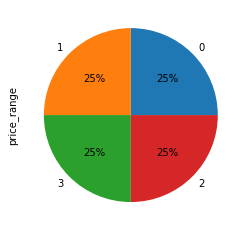

In [25]:
# Pie chart to visualize the count in each class with %
df['price_range'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

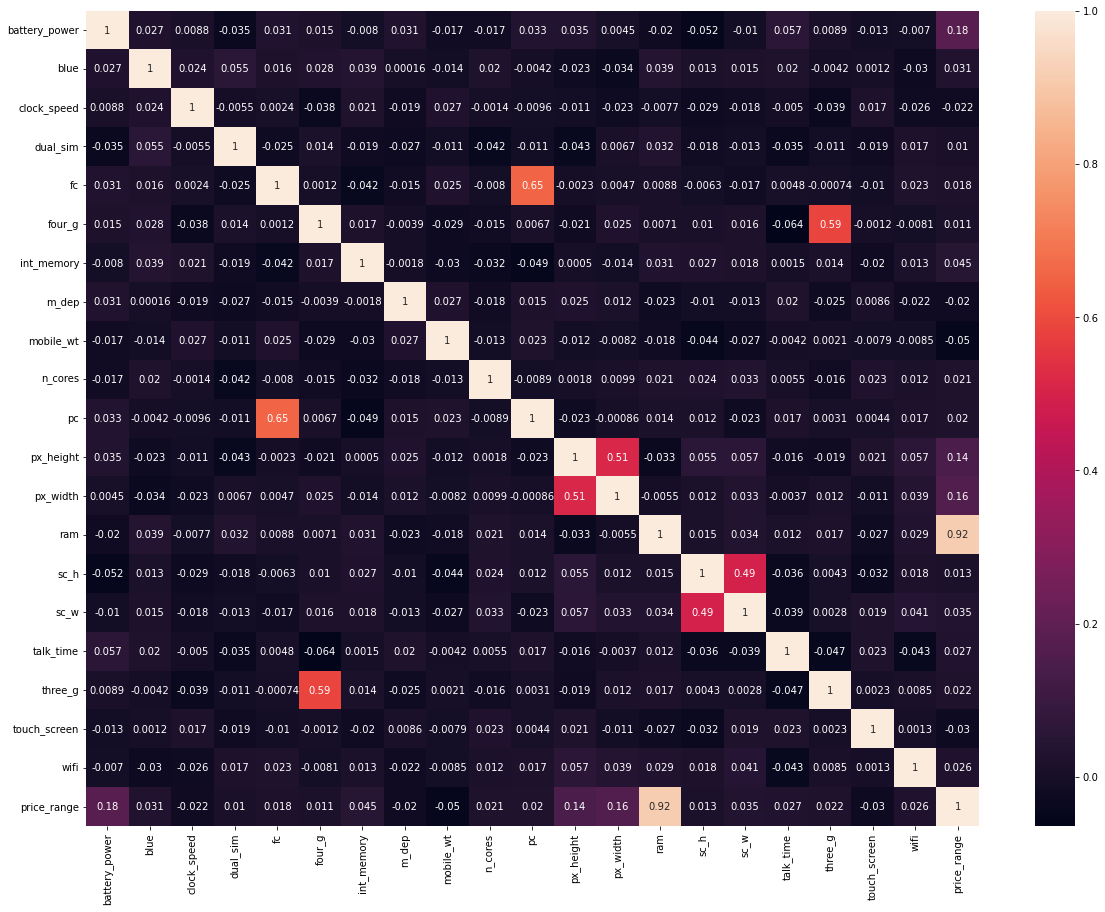

In [29]:
correlation = df.corr()
fig, axes = plt.subplots(figsize=(20,15))
sns.heatmap(correlation, annot=True, ax= axes)
plt.show()

In [30]:
# unstack correlation and drop redundant correlation values
correlation = correlation.unstack().sort_values().drop_duplicates()
# take all correlation values except 1, the left diagonal as it shows the ccorrelation with itself
correlation = correlation[correlation!=1]

In [31]:
# max correlation value
correlation.max()

0.9158003590987143

In [32]:
# pair with max correlation
correlation.idxmax()

('ram', 'price_range')

In [33]:
x = df.drop('price_range', axis=1)  # independent variables :  all datas except last column
y = df.iloc[:,-1]  # dependent variable : only last column  -> df['price_range']

In [34]:
# 75% training data and 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

In [35]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('K Nearest Neighbors (KNN)', KNeighborsClassifier()))
models.append(('Support Vector Machine(SVM)', SVC()))

In [39]:
from sklearn.metrics import classification_report

for name,model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("{} :- \tAccuracy = {:.4f}".format(name,accuracy))

Logistic Regression :- 	Accuracy = 0.9025
Naive Bayes :- 	Accuracy = 0.7650
Decision Tree Classifier :- 	Accuracy = 0.8075
Random Forest Classifier :- 	Accuracy = 0.8325
K Nearest Neighbors (KNN) :- 	Accuracy = 0.4525
Support Vector Machine(SVM) :- 	Accuracy = 0.8400


From the above, Logistic Regression has the highest accuracy of 90%.

In [40]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [41]:
print('Classification Report :\n', classification_report(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        93
           1       0.86      0.93      0.89        94
           2       0.82      0.85      0.84        99
           3       0.99      0.85      0.92       114

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.90      0.90       400



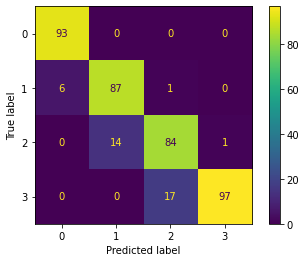

In [42]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
plt.show()

 --- 
 Archana S  <br/>
 +91-9566735320  <br/>
 its4archana@gmail.com  <br/>